Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn import metrics, preprocessing, tree, svm, linear_model, ensemble                         
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from numpy import where
from collections import Counter
import time
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap  
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from sklearn.compose import ColumnTransformer

Loading dataset

In [4]:
df = pd.read_csv('sick_csv.csv')

## EDA & Data Preparation

Making an observation of the dataset

In [5]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


Checking statistical details for numerical variables

In [6]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

Making an observation of missing values

In [8]:
df.isna().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [9]:
df.isna().sum().sum()

6064

Initial dropping of unnecessary variables

In [10]:
df = df.drop(['TBG'], axis=1)
df = df.drop(['referral_source'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [12]:
df.isna().sum().sum()

2292

Dropping observations with missing values

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   float64
 1   sex                        2643 non-null   object 
 2   on_thyroxine               2643 non-null   object 
 3   query_on_thyroxine         2643 non-null   object 
 4   on_antithyroid_medication  2643 non-null   object 
 5   sick                       2643 non-null   object 
 6   pregnant                   2643 non-null   object 
 7   thyroid_surgery            2643 non-null   object 
 8   I131_treatment             2643 non-null   object 
 9   query_hypothyroid          2643 non-null   object 
 10  query_hyperthyroid         2643 non-null   object 
 11  lithium                    2643 non-null   object 
 12  goitre                     2643 non-null   object 
 13  tumor                      2643 non-null   objec

Replacing string values with appropriate numerical values

In [15]:
df = df.replace('negative',0, regex=True)
df = df.replace('sick',1, regex=True)
df = df.replace('f',0, regex=True)
df = df.replace('t',1, regex=True)
df = df.replace('M',1, regex=True)
df = df.replace('F',2, regex=True)

Resetting index for the new dataset

In [16]:
df = df.reset_index(drop=True)

In [17]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,Class
0,41.0,2,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,0,0
1,70.0,2,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,0
2,80.0,2,0,0,0,0,0,0,0,0,...,1,0.6,1,80.0,1,0.70,1,115.0,0,1
3,66.0,2,0,0,0,0,0,0,0,0,...,1,2.2,1,123.0,1,0.93,1,132.0,0,0
4,68.0,1,0,0,0,0,0,0,0,0,...,1,1.6,1,83.0,1,0.89,1,93.0,0,0


Making an observation of the maximum value of age variable

In [18]:
df['age'].max()

455.0

Creating new dataset with only the age inclusive and up to 100

In [19]:
df = df[df.age <= 100]

In [20]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,Class
0,41.0,2,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,0,0
1,70.0,2,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,0
2,80.0,2,0,0,0,0,0,0,0,0,...,1,0.6,1,80.0,1,0.70,1,115.0,0,1
3,66.0,2,0,0,0,0,0,0,0,0,...,1,2.2,1,123.0,1,0.93,1,132.0,0,0
4,68.0,1,0,0,0,0,0,0,0,0,...,1,1.6,1,83.0,1,0.89,1,93.0,0,0


In [21]:
df.age.max()

94.0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2642 entries, 0 to 2642
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2642 non-null   float64
 1   sex                        2642 non-null   int64  
 2   on_thyroxine               2642 non-null   int64  
 3   query_on_thyroxine         2642 non-null   int64  
 4   on_antithyroid_medication  2642 non-null   int64  
 5   sick                       2642 non-null   int64  
 6   pregnant                   2642 non-null   int64  
 7   thyroid_surgery            2642 non-null   int64  
 8   I131_treatment             2642 non-null   int64  
 9   query_hypothyroid          2642 non-null   int64  
 10  query_hyperthyroid         2642 non-null   int64  
 11  lithium                    2642 non-null   int64  
 12  goitre                     2642 non-null   int64  
 13  tumor                      2642 non-null   int64

Making an observation on the shape of the dataset

In [23]:
df.shape

(2642, 28)

Creating a pairplot to make observation of the distribution of the variables

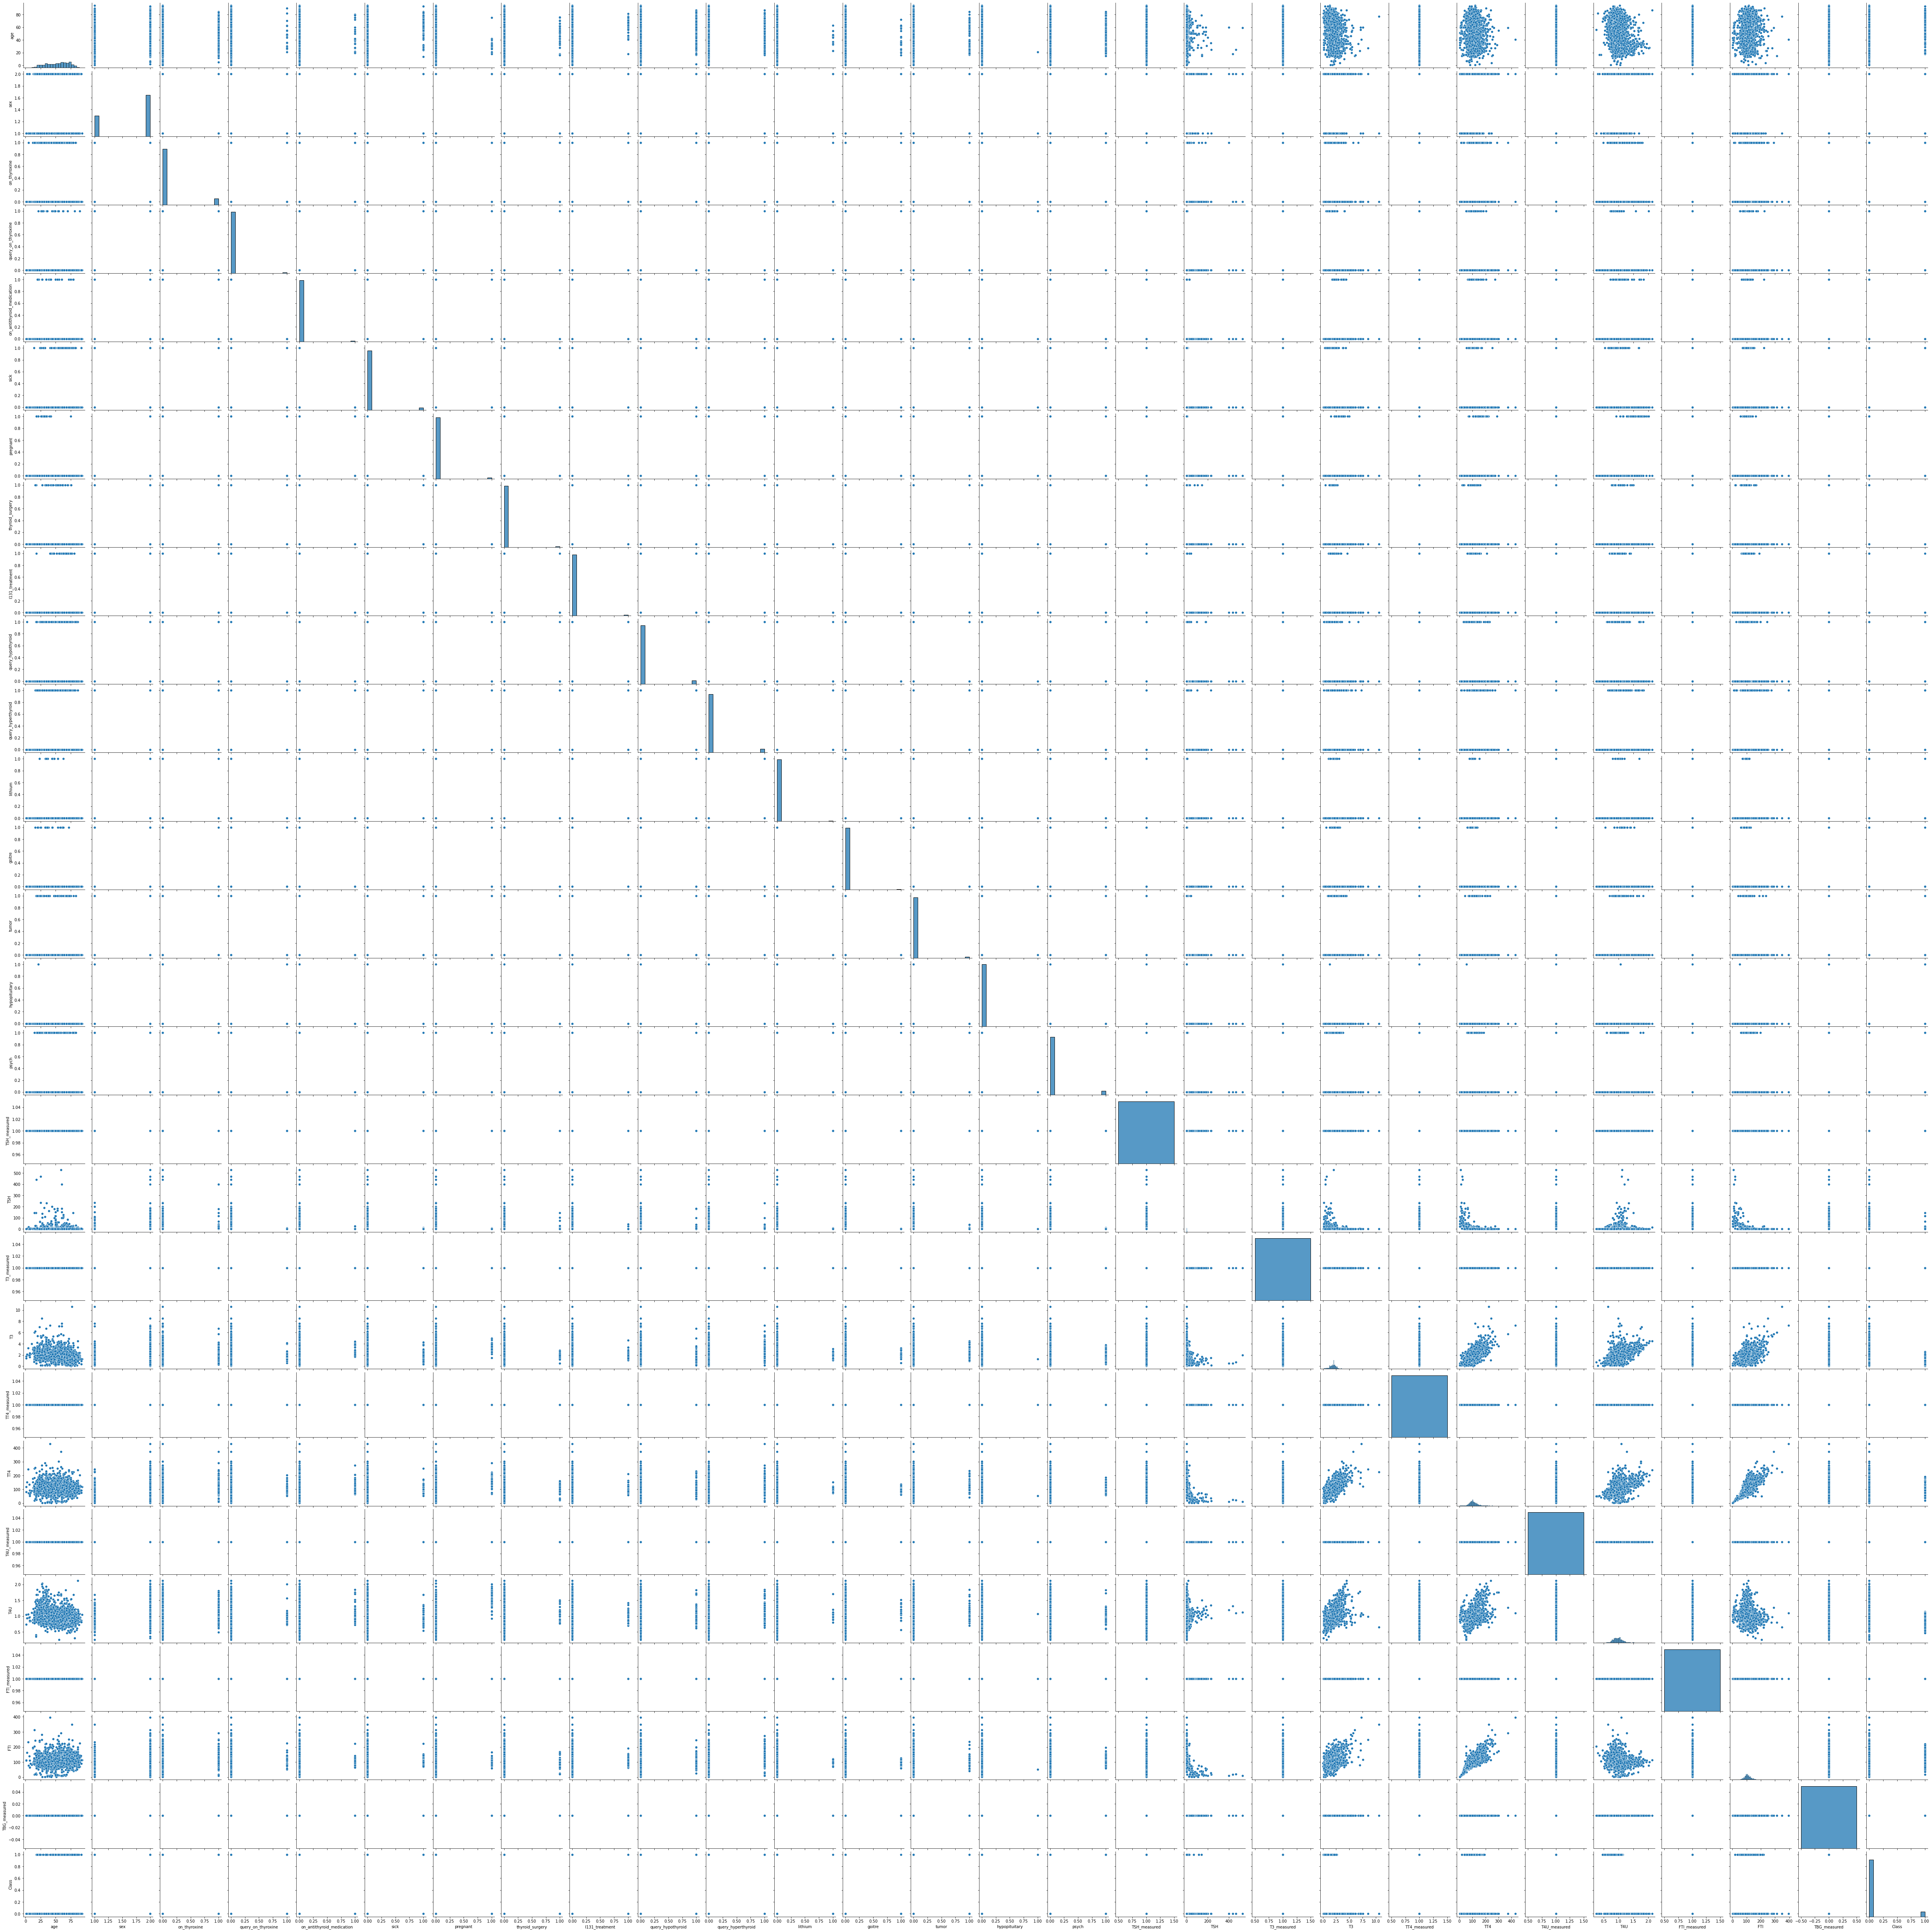

In [24]:
sns.pairplot(df)

Creating countplot to make an observation of the target variable

C:\Users\Machine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


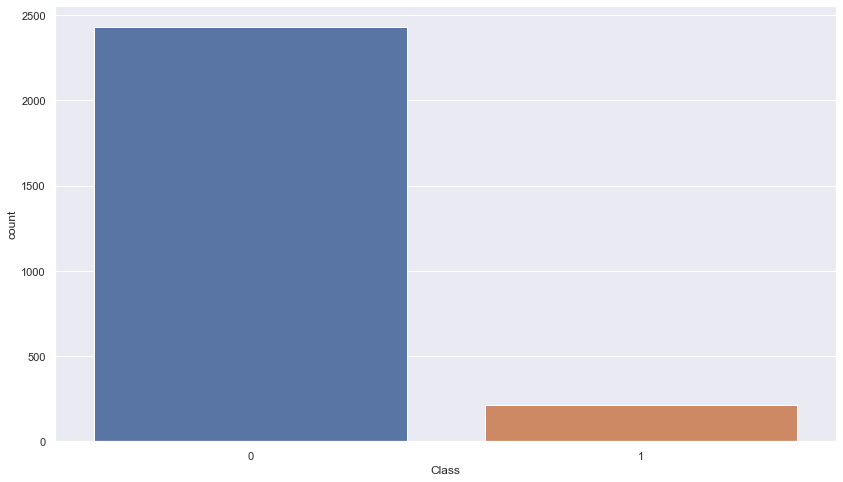

In [25]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(df['Class'])

Creating a countplot to make an observation of the gender distribution

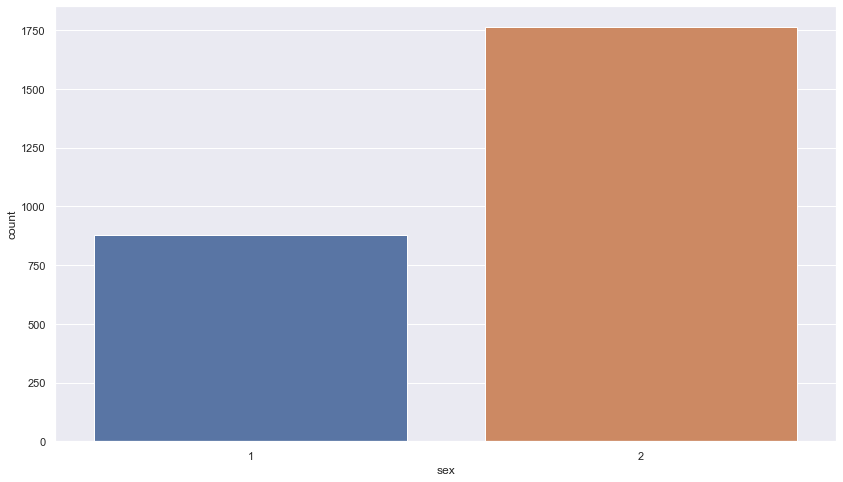

In [26]:
sns.countplot(x='sex', data=df)

Creating a factorplot to make an observation of the distribution of the target variable with gender split

C:\Users\Machine\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


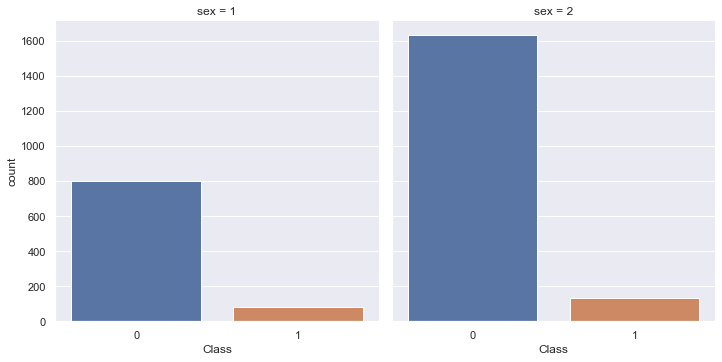

In [27]:
sns.factorplot(x='Class', col='sex', kind='count', data=df)

Creating value counts to make an observation of the distribution of the target variable and also of the gender split in the dataset.

In [28]:
df['Class'].value_counts()

0    2430
1     212
Name: Class, dtype: int64

In [29]:
df['sex'].value_counts()

2    1763
1     879
Name: sex, dtype: int64

Creating new datasets in an aim to observe the distribution of the target variable within each present gender.

In [30]:
df_sick = df[df.Class==1]

In [31]:
df_notSick = df[df.Class==0]

In [32]:
df_sick['sex'].value_counts()

2    131
1     81
Name: sex, dtype: int64

In [33]:
df_notSick['sex'].value_counts()

2    1632
1     798
Name: sex, dtype: int64

Printing the percentage of the minority class within the target variable with regards of the genders.

In [34]:
print(df_sick[df_sick.sex == 1].Class.count()/df[df.sex == 1].Class.count())
print(df_sick[df_sick.sex == 2].Class.count()/df[df.sex == 2].Class.count())

0.09215017064846416
0.07430516165626773


## Selecting important Features

Defining predictor and target featurest

In [35]:
X = df.drop(['Class'], axis = 1)
Y = df['Class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20,random_state = 101)

Building RandomForestClassifier model, fitting trained dataset and printing report

In [36]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.5288098000000332
[[491   5]
 [  2  31]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       496
           1       0.86      0.94      0.90        33

    accuracy                           0.99       529
   macro avg       0.93      0.96      0.95       529
weighted avg       0.99      0.99      0.99       529



Checking feature importance with trainedforest feature importance

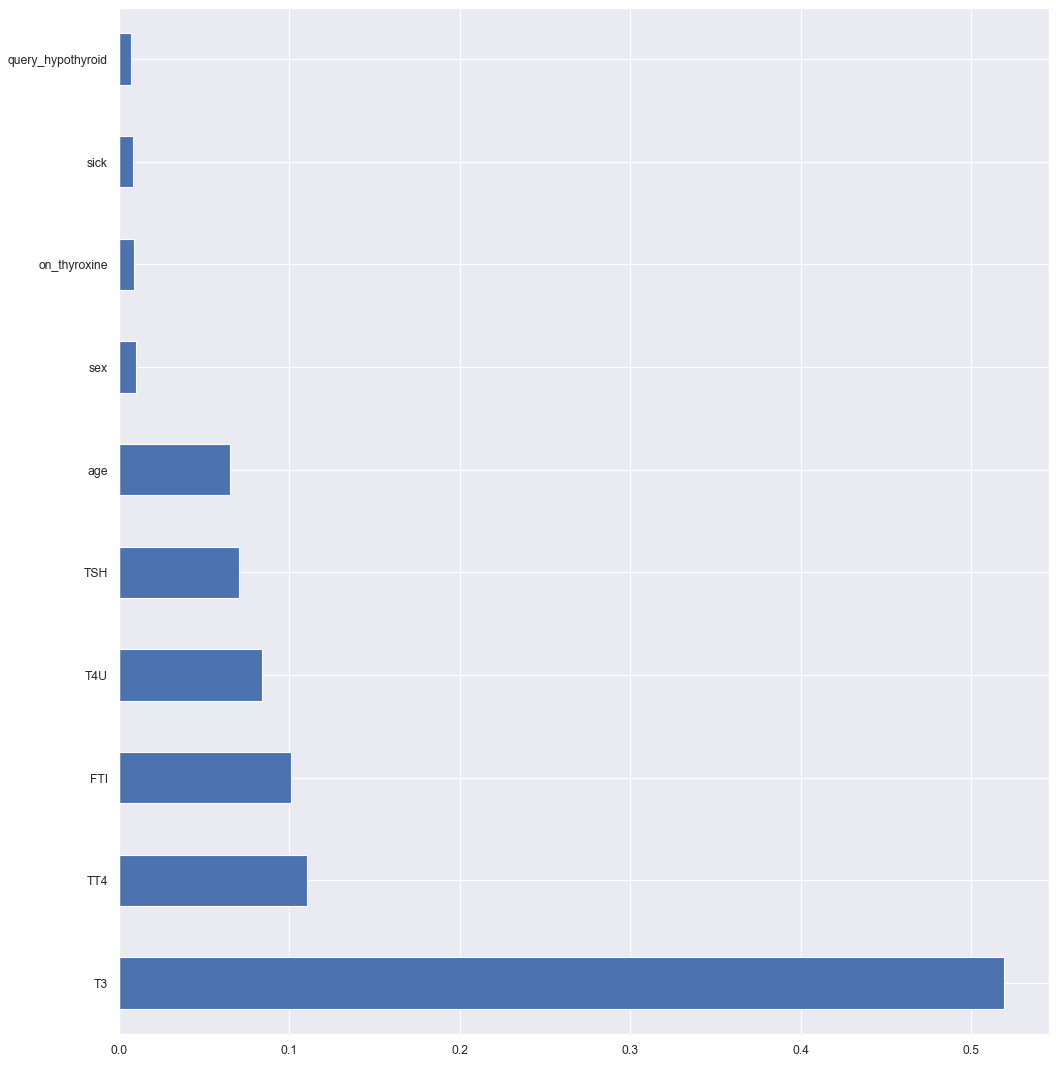

In [37]:
figure(num=None, figsize=(15, 17), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= df.drop(['Class'], axis = 1).columns)
feat_importances.nlargest(10).plot(kind='barh')

Printing feature correlation(higher than 15%) with target variable

In [38]:
corr= df.corr()
corr_y = abs(corr["Class"])
highest_corr = corr_y[corr_y >0.15]
highest_corr.sort_values(ascending=True)

age      0.180905
T4U      0.243339
T3       0.397426
Class    1.000000
Name: Class, dtype: float64

Creating heatmap to visualize feature correlations

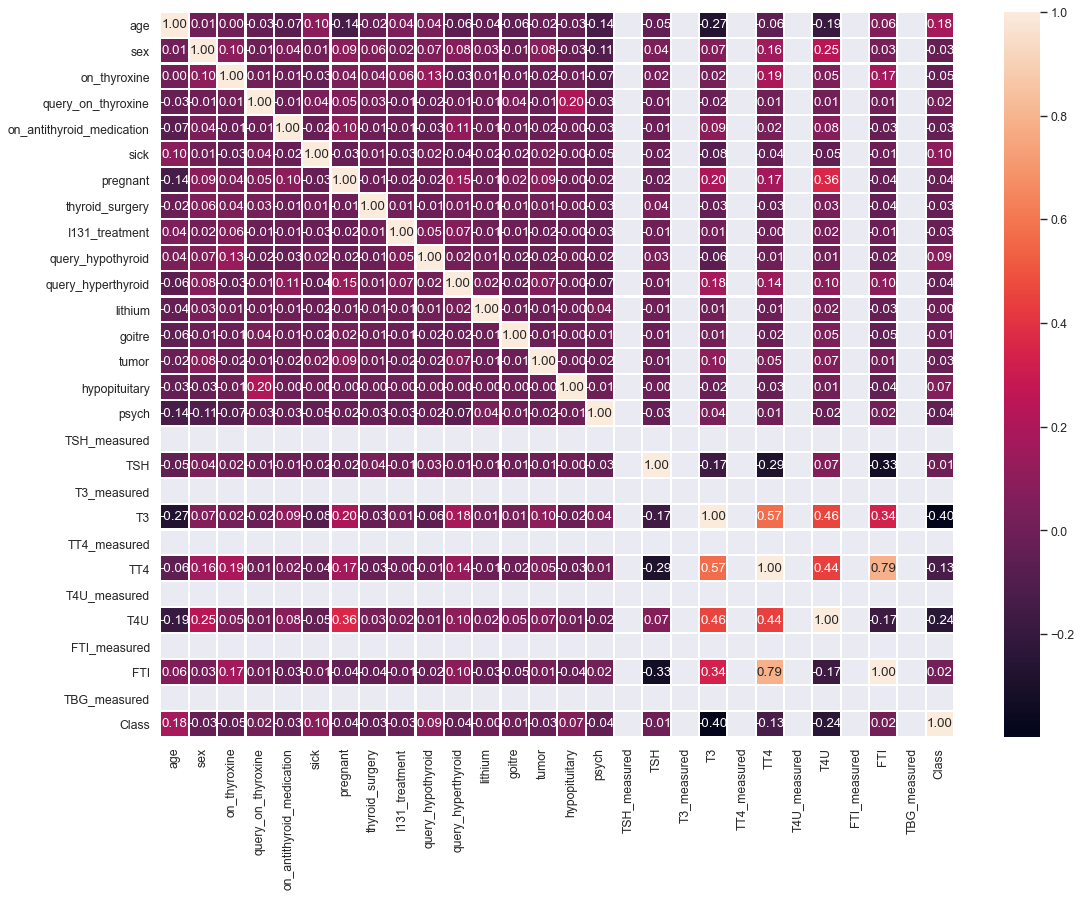

In [39]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=1)

Creating a new dataset with reduced features and resetting the index counter

In [40]:
df_r1 = df.drop(columns=['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'], axis = 1)

In [41]:
df_r1 = df_r1.reset_index(drop=True)

In [42]:
df_r1.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,1
3,66.0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0.60,2.2,123.0,0.93,132.0,0
4,68.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,1.6,83.0,0.89,93.0,0


Printing feature correlations with target variable

In [43]:
corr= df_r1.corr()
corr_y = abs(corr["Class"])
highest_corr = corr_y[corr_y >0.15]
highest_corr.sort_values(ascending=True)

age      0.180905
T4U      0.243339
T3       0.397426
Class    1.000000
Name: Class, dtype: float64

Creating heatmap to visualize feature correlation of new dataset

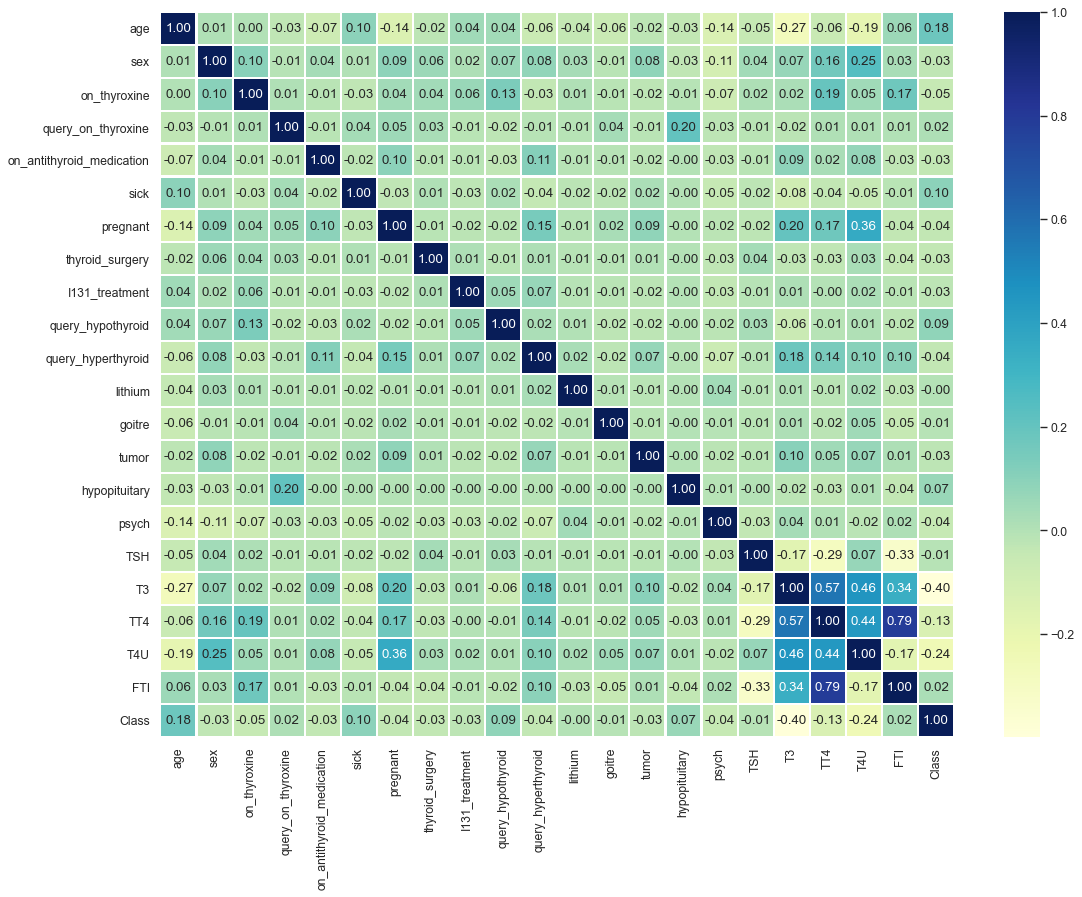

In [44]:
figure(num=None, figsize=(16, 12), dpi=80)
sns.heatmap(df_r1.corr(), cmap="YlGnBu", annot=True, fmt='.2f', linewidths=1)

Printing the absolute value of feature correlations with the target variable in ascending order

In [45]:
abs(df_r1.corr())['Class'].sort_values(ascending = False)

Class                        1.000000
T3                           0.397426
T4U                          0.243339
age                          0.180905
TT4                          0.126958
sick                         0.095936
query_hypothyroid            0.087103
hypopituitary                0.065880
on_thyroxine                 0.047897
psych                        0.043388
pregnant                     0.037084
query_hyperthyroid           0.035204
on_antithyroid_medication    0.033219
thyroid_surgery              0.033219
sex                          0.030950
tumor                        0.025235
I131_treatment               0.025212
FTI                          0.022060
query_on_thyroxine           0.015774
goitre                       0.009722
TSH                          0.008023
lithium                      0.002368
Name: Class, dtype: float64

Defining predictor and target features and training dataset

In [46]:
X = df_r1.drop(['Class'], axis = 1)
Y = df_r1['Class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 101)

Building and fitting Random Forest model and then printing report

In [47]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.4040090000000305
[[736   9]
 [  5  43]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       745
           1       0.83      0.90      0.86        48

    accuracy                           0.98       793
   macro avg       0.91      0.94      0.93       793
weighted avg       0.98      0.98      0.98       793



Plotting feature importance in df_r1 dataset

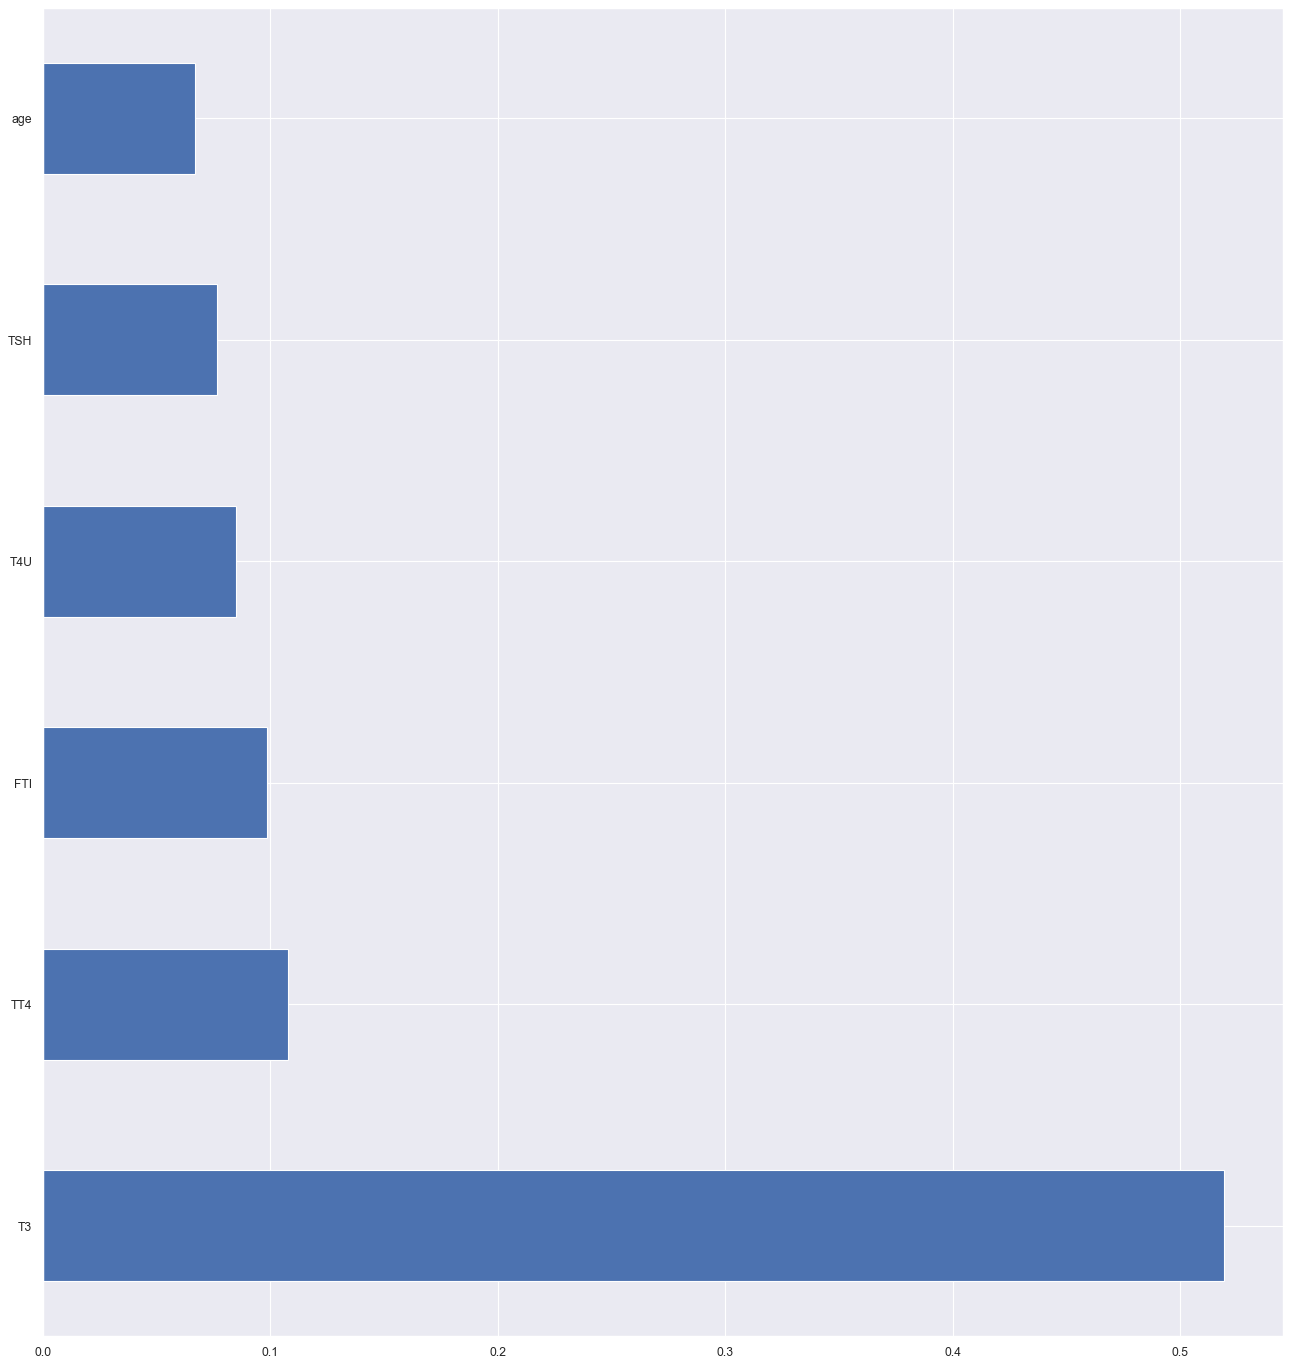

In [48]:
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= df_r1.drop(['Class'], axis = 1).columns)
feat_importances.nlargest(6).plot(kind='barh')

Defining predictor and target features for further reduced df_r1 dataset. Building, fitting new model and printing report for comparison.

In [49]:
X_Reduced = df_r1[['T3','TT4','FTI','T4U','TSH','age']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30, 
                                                        random_state = 101)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

1.4196091000000024
[[738   7]
 [  4  44]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       745
           1       0.86      0.92      0.89        48

    accuracy                           0.99       793
   macro avg       0.93      0.95      0.94       793
weighted avg       0.99      0.99      0.99       793



In [50]:
df_r1.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,1
3,66.0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0.60,2.2,123.0,0.93,132.0,0
4,68.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,1.6,83.0,0.89,93.0,0


Building and fitting already trained dataset to the LassoCV model and printing the report to view feature selection details.

In [51]:
from sklearn.linear_model import LassoCV
regr = LassoCV(cv=5, random_state=102)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(df_r1.columns[:21]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

LassoCV Best Alpha Scored:  0.001426371513012653
LassoCV Model Accuracy:  0.16604767950262966
Variables Eliminated:  3
Variables Kept:  18


Plotting previous results to visualize feature selection.

Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

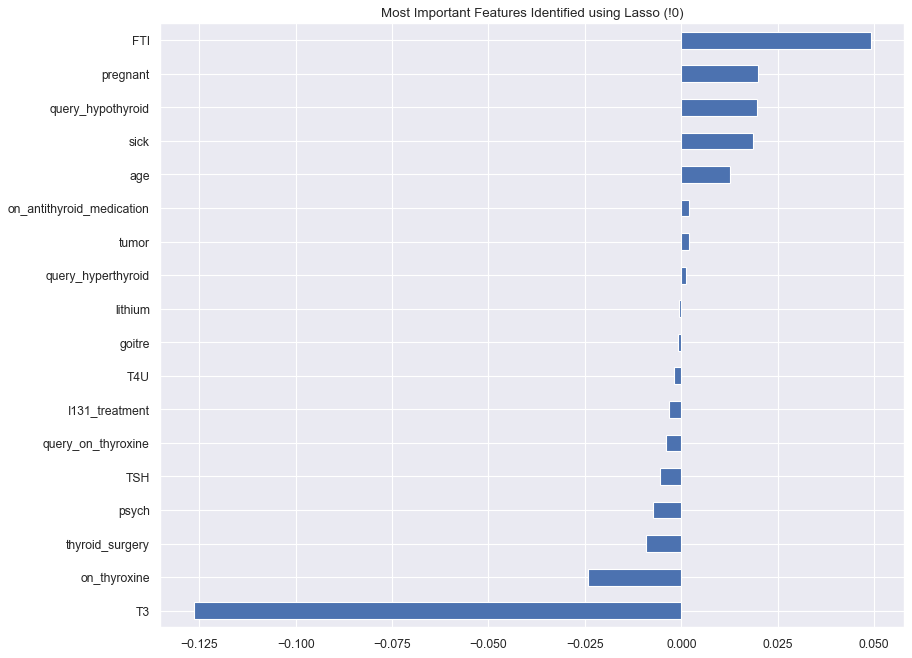

In [52]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

Creating new dataset with newly selected features and resetting its index counter

In [53]:
df_r2 = df[['T3','FTI','T4U','TT4','TSH','age','sick','query_hypothyroid','Class']]

In [54]:
df_r2 = df_r2.reset_index(drop=True)

In [55]:
df_r2.head()

,T3,FTI,T4U,TT4,TSH,age,sick,query_hypothyroid,Class
0,2.5,109.0,1.14,125.0,1.30,41.0,0,0,0
1,1.2,70.0,0.87,61.0,0.72,70.0,0,0,0
2,0.6,115.0,0.70,80.0,2.20,80.0,0,0,1
3,2.2,132.0,0.93,123.0,0.60,66.0,0,0,0
4,1.6,93.0,0.89,83.0,2.40,68.0,0,0,0


## Random Forest

Defining predictor and target features for df_r2 dataset

In [56]:
X = df_r2.drop(['Class'], axis = 1)
Y = df_r2['Class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

Resampling unbalanced dataset using RandomUnderSampler

In [57]:
rus = RandomUnderSampler(
    sampling_strategy='auto',
    random_state=0,
    replacement=True)
X_resampled, y_resampled = rus.fit_resample(X, Y)

In [58]:
X.shape, Y.shape

((2642, 8), (2642,))

In [59]:
X_resampled.shape, y_resampled.shape

((424, 8), (424,))

Split datasets into training set and test set.

In [60]:
X_Train1, X_Test1, Y_Train1, Y_Test1 = train_test_split(X_resampled, y_resampled, test_size = 0.30, 
                                                    random_state = 150)

Building, fitting Random Forest model and printing report

In [61]:
start1 = time.process_time()
trainedforest1 = RandomForestClassifier(n_estimators=700).fit(X_Train1,Y_Train1)
print(time.process_time() - start1)
predictionforest1 = trainedforest1.predict(X_Test1)
print(confusion_matrix(Y_Test1,predictionforest1))
print(classification_report(Y_Test1,predictionforest1))

0.9984064000000217
[[61  4]
 [ 4 59]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.94      0.94      0.94        63

    accuracy                           0.94       128
   macro avg       0.94      0.94      0.94       128
weighted avg       0.94      0.94      0.94       128



Resampling unbalanced dataset using CondensedNearestNeighbour

In [62]:
cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',
    random_state=15,
    n_neighbors=3,
    n_jobs=4)
X_resampled1, y_resampled1 = cnn.fit_resample(X,Y)

In [63]:
X.shape, Y.shape

((2642, 8), (2642,))

In [64]:
X_resampled1.shape, y_resampled1.shape

((411, 8), (411,))

Split datasets into training set and test set.

In [65]:
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_resampled1, y_resampled1, test_size = 0.30, 
                                                    random_state = 300)

Building, fitting Random Forest model and printing report

In [66]:
start2 = time.process_time()
trainedforest2 = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start2)
predictionforest2 = trainedforest2.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest2))
print(classification_report(Y_Test2,predictionforest2))

1.0608067999999662
[[52 12]
 [10 50]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        64
           1       0.81      0.83      0.82        60

    accuracy                           0.82       124
   macro avg       0.82      0.82      0.82       124
weighted avg       0.82      0.82      0.82       124



Creating dataset, by first splitting existing one into the target variable's minority and majority classes, then taking 15% fraction of majority class. The new dataset created by concatinatng the new majority class with the minority then schuffeling the dataset and resetting its index counter

In [67]:
df_negative = df_r2[df_r2['Class'] == 0]
df_positive = df_r2[df_r2['Class'] == 1]
df_negative_sample = df_negative.sample(random_state=110, frac=.15)
df_unders = pd.concat([df_negative_sample, df_positive])
df_unders = df_unders.sample(frac=1).reset_index(drop=True)

In [68]:
df_unders.head()

,T3,FTI,T4U,TT4,TSH,age,sick,query_hypothyroid,Class
0,1.2,91.0,0.80,73.0,7.90,56.0,0,0,0
1,2.5,89.0,0.99,89.0,0.58,57.0,0,0,0
2,0.6,179.0,0.46,82.0,0.80,69.0,0,0,1
3,0.6,113.0,1.06,120.0,0.30,72.0,0,0,1
4,0.8,106.0,0.86,91.0,4.60,73.0,0,0,1


In [69]:
df_unders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   T3                 576 non-null    float64
 1   FTI                576 non-null    float64
 2   T4U                576 non-null    float64
 3   TT4                576 non-null    float64
 4   TSH                576 non-null    float64
 5   age                576 non-null    float64
 6   sick               576 non-null    int64  
 7   query_hypothyroid  576 non-null    int64  
 8   Class              576 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.6 KB


Defining predictor and target features for both df_unders and df_r2 datasets

In [70]:
X = df_unders.drop(['Class'], axis = 1)
Y = df_unders['Class']

In [71]:
X2 = df_r2.drop(['Class'], axis = 1)
Y2 = df_r2['Class']

Split datasets into training sets and test sets each of the splitted datasets with 3 different training and testing ratio

In [72]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, 
                                                    random_state = 177)

In [73]:
X_Train1, X_Test1, Y_Train1, Y_Test1 = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 178)

In [74]:
X_Train12, X_Test12, Y_Train12, Y_Test12 = train_test_split(X, Y, test_size = 0.35, 
                                                    random_state = 176)

In [75]:
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X2, Y2, test_size = 0.20, 
                                                    random_state = 179)

In [76]:
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X2, Y2, test_size = 0.30, 
                                                    random_state = 180)

In [77]:
X_Train31, X_Test31, Y_Train31, Y_Test31 = train_test_split(X2, Y2, test_size = 0.35, 
                                                    random_state = 180)

Building and fitting 6 models for the 3-3 differently trained data, then printing the report for each

In [78]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.060806800000023
[[72  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.98      0.95      0.96        43

    accuracy                           0.97       116
   macro avg       0.97      0.97      0.97       116
weighted avg       0.97      0.97      0.97       116



In [79]:
start1 = time.process_time()
trainedforest1 = RandomForestClassifier(n_estimators=700).fit(X_Train1,Y_Train1)
print(time.process_time() - start1)
predictionforest1 = trainedforest1.predict(X_Test1)
print(confusion_matrix(Y_Test1,predictionforest1))
print(classification_report(Y_Test1,predictionforest1))

1.0296066000000224
[[116   4]
 [  4  49]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       0.92      0.92      0.92        53

    accuracy                           0.95       173
   macro avg       0.95      0.95      0.95       173
weighted avg       0.95      0.95      0.95       173



In [80]:
start12 = time.process_time()
trainedforest12 = RandomForestClassifier(n_estimators=700).fit(X_Train12,Y_Train12)
print(time.process_time() - start12)
predictionforest12 = trainedforest12.predict(X_Test12)
print(confusion_matrix(Y_Test12,predictionforest12))
print(classification_report(Y_Test12,predictionforest12))

0.9984064000000217
[[127   2]
 [  4  69]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       129
           1       0.97      0.95      0.96        73

    accuracy                           0.97       202
   macro avg       0.97      0.96      0.97       202
weighted avg       0.97      0.97      0.97       202



In [81]:
start2 = time.process_time()
trainedforest2 = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start2)
predictionforest2 = trainedforest2.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest2))
print(classification_report(Y_Test2,predictionforest2))

1.4976096000000325
[[490   5]
 [  2  32]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       495
           1       0.86      0.94      0.90        34

    accuracy                           0.99       529
   macro avg       0.93      0.97      0.95       529
weighted avg       0.99      0.99      0.99       529



In [82]:
start3 = time.process_time()
trainedforest3 = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start3)
predictionforest3 = trainedforest3.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest3))
print(classification_report(Y_Test3,predictionforest3))

1.3884089000000017
[[726   5]
 [ 10  52]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       731
           1       0.91      0.84      0.87        62

    accuracy                           0.98       793
   macro avg       0.95      0.92      0.93       793
weighted avg       0.98      0.98      0.98       793



In [83]:
start31 = time.process_time()
trainedforest31 = RandomForestClassifier(n_estimators=700).fit(X_Train31,Y_Train31)
print(time.process_time() - start31)
predictionforest31 = trainedforest31.predict(X_Test31)
print(confusion_matrix(Y_Test31,predictionforest31))
print(classification_report(Y_Test31,predictionforest31))

1.372808799999973
[[851   6]
 [  8  60]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       857
           1       0.91      0.88      0.90        68

    accuracy                           0.98       925
   macro avg       0.95      0.94      0.94       925
weighted avg       0.98      0.98      0.98       925



## Decision Tree Model

In [84]:
df_unders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   T3                 576 non-null    float64
 1   FTI                576 non-null    float64
 2   T4U                576 non-null    float64
 3   TT4                576 non-null    float64
 4   TSH                576 non-null    float64
 5   age                576 non-null    float64
 6   sick               576 non-null    int64  
 7   query_hypothyroid  576 non-null    int64  
 8   Class              576 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.6 KB


In [85]:
df_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   T3                 2642 non-null   float64
 1   FTI                2642 non-null   float64
 2   T4U                2642 non-null   float64
 3   TT4                2642 non-null   float64
 4   TSH                2642 non-null   float64
 5   age                2642 non-null   float64
 6   sick               2642 non-null   int64  
 7   query_hypothyroid  2642 non-null   int64  
 8   Class              2642 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 185.9 KB


Defining numerical and categorical features for StandardScaler and OneHotEncoder

In [86]:
numerical = ['T3', 'FTI', 'T4U', 'TT4', 'TSH', 'age']

categorical = ["sick", "query_hypothyroid"]

Instantiating Standard Scaler and OneHotEncoder pipelines at the letter we also removing labels if there is any

In [87]:
ss = Pipeline(steps=[('ss', StandardScaler())])
ohe = Pipeline(steps=[('ohe', OneHotEncoder(drop='first'))])

Creating a preprocess column transformer to perform the scaling and encoding

In [88]:
preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, numerical),
                        ('cat', ohe, categorical)
                    ])

Creating Pipeline with preprocess column transformer and a Decision Tree Classifier for all 6 differently trained dataset

In [89]:
dtree_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

In [90]:
dtree_pipe2 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

In [91]:
dtree_pipe21 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

In [92]:
dtree_pipe3 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

In [93]:
dtree_pipe4 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

In [94]:
dtree_pipe41 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

Fitting the pipeline to the train split for all six models

In [95]:
dtree_pipe.fit(X_Train, Y_Train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['T3', 'FTI', 'T4U', 'TT4',
                                                   'TSH', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sick',
                                                   'query_hypothyroid'])])),
                ('classifier', DecisionTreeClassifier())])

In [96]:
dtree_pipe2.fit(X_Train1, Y_Train1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['T3', 'FTI', 'T4U', 'TT4',
                                                   'TSH', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sick',
                                                   'query_hypothyroid'])])),
                ('classifier', DecisionTreeClassifier())])

In [97]:
dtree_pipe21.fit(X_Train12, Y_Train12)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['T3', 'FTI', 'T4U', 'TT4',
                                                   'TSH', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sick',
                                                   'query_hypothyroid'])])),
                ('classifier', DecisionTreeClassifier())])

In [98]:
dtree_pipe3.fit(X_Train2, Y_Train2)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['T3', 'FTI', 'T4U', 'TT4',
                                                   'TSH', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sick',
                                                   'query_hypothyroid'])])),
                ('classifier', DecisionTreeClassifier())])

In [99]:
dtree_pipe4.fit(X_Train3, Y_Train3)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['T3', 'FTI', 'T4U', 'TT4',
                                                   'TSH', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sick',
                                                   'query_hypothyroid'])])),
                ('classifier', DecisionTreeClassifier())])

In [100]:
dtree_pipe41.fit(X_Train31, Y_Train31)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['T3', 'FTI', 'T4U', 'TT4',
                                                   'TSH', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sick',
                                                   'query_hypothyroid'])])),
                ('classifier', DecisionTreeClassifier())])

Creating methods to evaluate the recall, accuracy, precision and F1 score for both models of df_unders an df_r2 datasets

In [101]:
def evaluation(Y, y_hat, title = 'Confusion Matrix'):
    
    cm = confusion_matrix(Y, y_hat)               
    precision = precision_score(Y, y_hat)         
    recall = recall_score(Y, y_hat)                
    accuracy = accuracy_score(Y,y_hat)            
    f1 = f1_score(Y,y_hat)                        
    
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    print('\n')
    
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt = 'g', annot_kws = {'size':20})
    plt.xlabel('predicted', fontsize = 18)
    plt.ylabel('actual', fontsize = 18)
    plt.title(title, fontsize = 18)

In [102]:
def evaluation2(Y2, y_hat, title = 'Confusion Matrix'):
    
    cm = confusion_matrix(Y2, y_hat)               
    precision = precision_score(Y2, y_hat)         
    recall = recall_score(Y2, y_hat)                
    accuracy = accuracy_score(Y2,y_hat)            
    f1 = f1_score(Y2,y_hat)                        
    
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    print('\n')
    
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt = 'g', annot_kws = {'size':20})
    plt.xlabel('predicted', fontsize = 18)
    plt.ylabel('actual', fontsize = 18)
    plt.title(title, fontsize = 18)

Calculate the training and testing accuracy by calling a method train_acc and test_acc for all 6 models

Train Accuracy for model 1 with 20/80 split is: 0.8956521739130435
Test Accuracy for model 1 with 20/80 split is:: 0.8189655172413793


Recall:  0.9302325581395349
Accuracy:  0.8189655172413793
Precision:  0.6896551724137931
F1:  0.7920792079207921




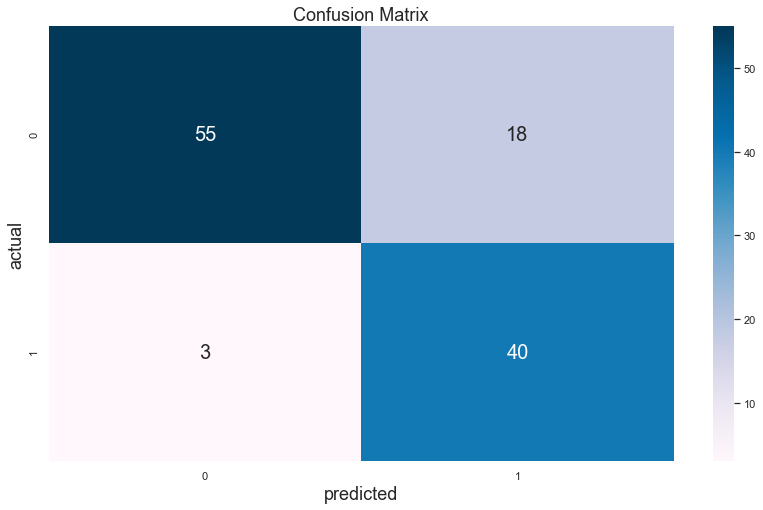

In [103]:
train_acc = accuracy_score(Y_Train, dtree_pipe.predict(X_Train))
test_acc = accuracy_score(Y_Test, dtree_pipe.predict(X_Test))

print('Train Accuracy for model 1 with 20/80 split is: {}'.format(train_acc))
print('Test Accuracy for model 1 with 20/80 split is:: {}'.format(test_acc))
print('\n')

evaluation(Y_Test, dtree_pipe.predict(X_Test))

Train Accuracy for model 1 with 30/70 split is:: 0.8833746898263027
Test Accuracy for model 1 with 30/70 split is:: 0.8439306358381503


Recall:  0.9433962264150944
Accuracy:  0.8439306358381503
Precision:  0.6756756756756757
F1:  0.7874015748031497




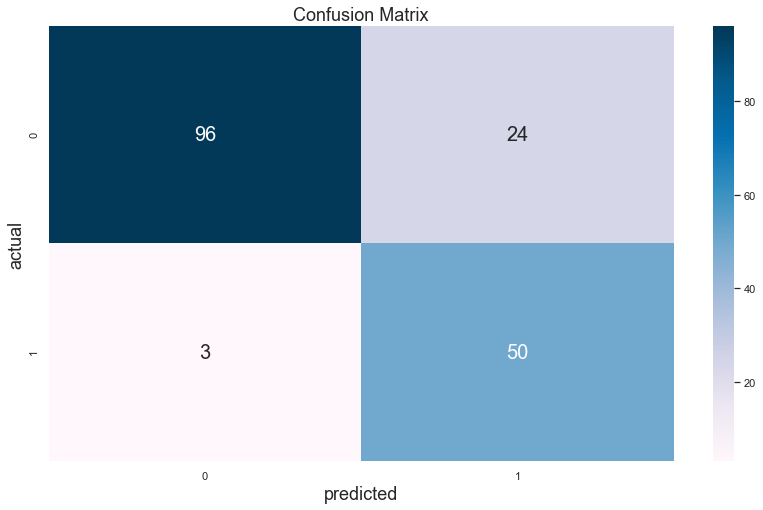

In [104]:
train_acc1 = accuracy_score(Y_Train1, dtree_pipe2.predict(X_Train1))
test_acc1 = accuracy_score(Y_Test1, dtree_pipe2.predict(X_Test1))

print('Train Accuracy for model 1 with 30/70 split is:: {}'.format(train_acc1))
print('Test Accuracy for model 1 with 30/70 split is:: {}'.format(test_acc1))
print('\n')

evaluation(Y_Test1, dtree_pipe2.predict(X_Test1))

Train Accuracy for model 1 with 35/65 split is:: 0.8716577540106952
Test Accuracy for model 1 with 35/65 split is:: 0.8910891089108911


Recall:  0.9726027397260274
Accuracy:  0.8910891089108911
Precision:  0.7802197802197802
F1:  0.8658536585365854




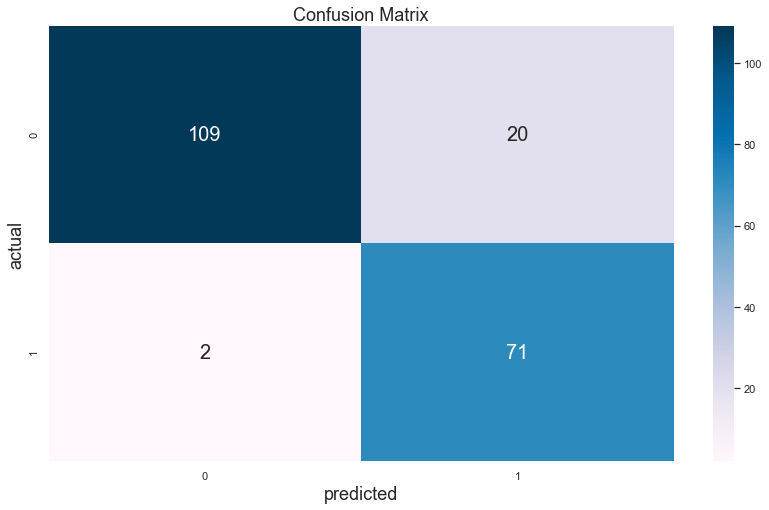

In [105]:
train_acc12 = accuracy_score(Y_Train12, dtree_pipe21.predict(X_Train12))
test_acc12 = accuracy_score(Y_Test12, dtree_pipe21.predict(X_Test12))

print('Train Accuracy for model 1 with 35/65 split is:: {}'.format(train_acc12))
print('Test Accuracy for model 1 with 35/65 split is:: {}'.format(test_acc12))
print('\n')

evaluation(Y_Test12, dtree_pipe21.predict(X_Test12))

Train Accuracy for model 2 with 20/80 split is:: 0.9962139138665405
Test Accuracy for model 2 with 20/80 split is:: 0.9829867674858223


Recall:  0.9705882352941176
Accuracy:  0.9829867674858223
Precision:  0.8048780487804879
F1:  0.8800000000000001




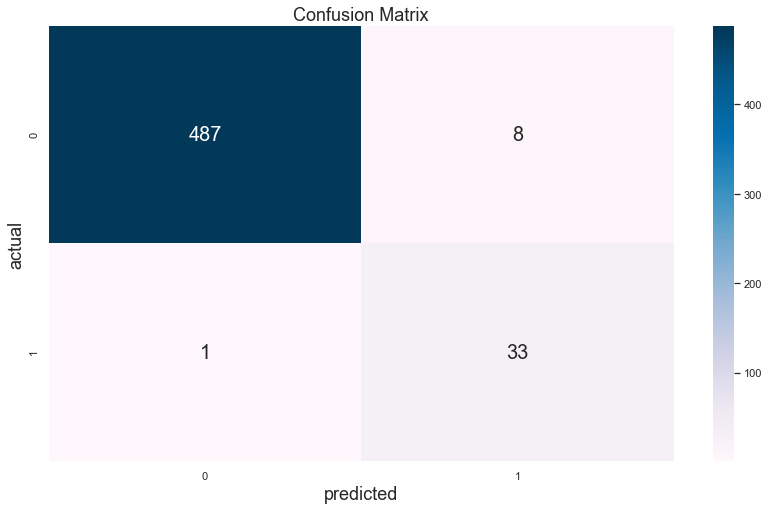

In [106]:
train_acc2 = accuracy_score(Y_Train2, dtree_pipe3.predict(X_Train2))
test_acc2 = accuracy_score(Y_Test2, dtree_pipe3.predict(X_Test2))

print('Train Accuracy for model 2 with 20/80 split is:: {}'.format(train_acc2))
print('Test Accuracy for model 2 with 20/80 split is:: {}'.format(test_acc2))
print('\n')

evaluation2(Y_Test2, dtree_pipe3.predict(X_Test2))

Train Accuracy for model 2 with 30/70 split is:: 0.9945916711736074
Test Accuracy for model 2 with 30/70 split is:: 0.9760403530895334


Recall:  0.9193548387096774
Accuracy:  0.9760403530895334
Precision:  0.8028169014084507
F1:  0.8571428571428572




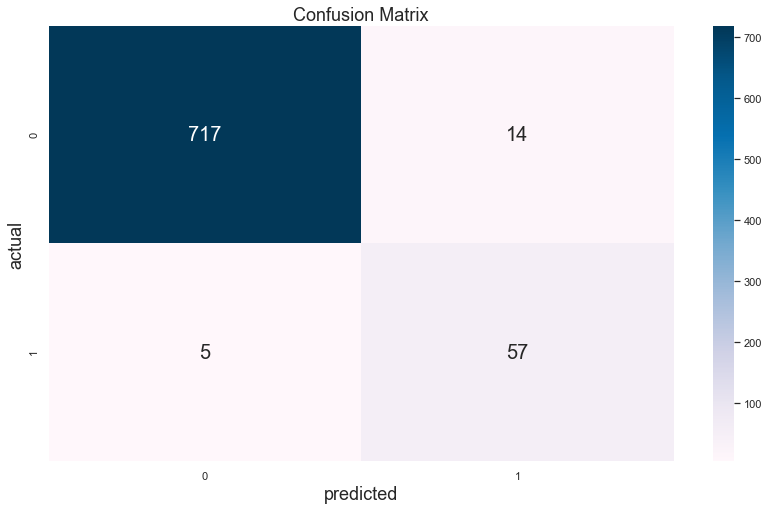

In [107]:
train_acc3 = accuracy_score(Y_Train3, dtree_pipe4.predict(X_Train3))
test_acc3 = accuracy_score(Y_Test3, dtree_pipe4.predict(X_Test3))

print('Train Accuracy for model 2 with 30/70 split is:: {}'.format(train_acc3))
print('Test Accuracy for model 2 with 30/70 split is:: {}'.format(test_acc3))
print('\n')

evaluation2(Y_Test3, dtree_pipe4.predict(X_Test3))

Train Accuracy for model 2 with 35/65 split is:: 1.0
Test Accuracy for model 2 with 35/65 split is:: 0.9751351351351352


Recall:  0.8823529411764706
Accuracy:  0.9751351351351352
Precision:  0.8
F1:  0.8391608391608392




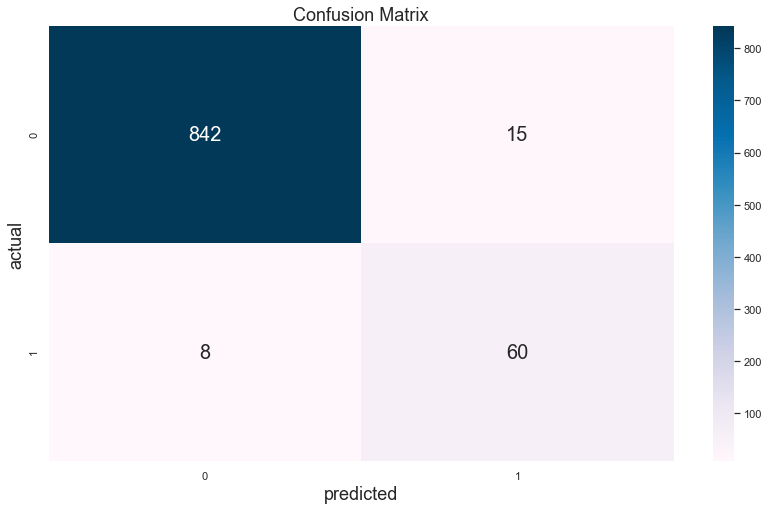

In [108]:
train_acc31 = accuracy_score(Y_Train31, dtree_pipe41.predict(X_Train31))
test_acc31 = accuracy_score(Y_Test31, dtree_pipe41.predict(X_Test31))

print('Train Accuracy for model 2 with 35/65 split is:: {}'.format(train_acc31))
print('Test Accuracy for model 2 with 35/65 split is:: {}'.format(test_acc31))
print('\n')

evaluation2(Y_Test31, dtree_pipe41.predict(X_Test31))

Splitting Data into 5 folds for the KFold splitting stratergy as input to cross_val_score() method. Then the split() method generate indices to split data into training and test set.

In [109]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 460, Test set:116
Fold:2, Train set: 461, Test set:115
Fold:3, Train set: 461, Test set:115
Fold:4, Train set: 461, Test set:115
Fold:5, Train set: 461, Test set:115


Creating a function for RMSE

In [110]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

Defining and printing scores

In [111]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, Y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-0.02476293 -0.01343826 -0.02360435 -0.02181391 -0.03722609]
rmse= 0.16


Creating array with preset estimatiors then calculating RMSE with each of them. 

In [112]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, Y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())


For estimators: 50
rmse= 0.15
For estimators: 100
rmse= 0.16
For estimators: 150
rmse= 0.16
For estimators: 200
rmse= 0.16
For estimators: 250
rmse= 0.16
For estimators: 300
rmse= 0.16
For estimators: 350
rmse= 0.16


Splitting Data into 5 folds for the KFold splitting stratergy as input to cross_val_score() method. Then the split() method generate indices to split data into training and test set.

In [113]:
kf2 =KFold(n_splits=5, shuffle=True, random_state=45)

cnt2 = 1

for train_index, test_index in kf2.split(X2, Y2):
    print(f'Fold:{cnt2}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt2 += 1

Fold:1, Train set: 2113, Test set:529
Fold:2, Train set: 2113, Test set:529
Fold:3, Train set: 2114, Test set:528
Fold:4, Train set: 2114, Test set:528
Fold:5, Train set: 2114, Test set:528


Creating a function for RMSE

In [114]:
def rmse1(score1):
    rmse1 = np.sqrt(-score1)
    print(f'rmse= {"{:.2f}".format(rmse1)}')

Defining and printing scores

In [115]:
score1 = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X2, Y2, cv= kf2, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score1}')
rmse1(score1.mean())

Scores for each fold are: [-0.01390926 -0.01656767 -0.01889697 -0.0116803  -0.01902178]
rmse= 0.13


Creating array with preset estimatiors then calculating RMSE with each of them

In [116]:
estimators2 = [50, 100, 150, 200, 250, 300, 350]

for count in estimators2:
    score1 = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 45), X2, Y2, cv= kf2, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse1(score1.mean())


For estimators: 50
rmse= 0.13
For estimators: 100
rmse= 0.13
For estimators: 150
rmse= 0.13
For estimators: 200
rmse= 0.12
For estimators: 250
rmse= 0.12
For estimators: 300
rmse= 0.12
For estimators: 350
rmse= 0.12


(Gunjal, 2020)

Splitting 3 datasets in features and target variables and then scaling

In [117]:
X = df_r2.drop(['Class'], axis = 1)
Y = df_r2['Class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [118]:
X2 = df_r1.drop(['Class'], axis = 1)
Y2 = df_r1['Class']
X2 = pd.get_dummies(X2, prefix_sep='_')
Y2 = LabelEncoder().fit_transform(Y2)
X2 = StandardScaler().fit_transform(X2)

In [119]:
X3 = df_unders.drop(['Class'], axis = 1)
Y3 = df_unders['Class']
X3 = pd.get_dummies(X3, prefix_sep='_')
Y3 = LabelEncoder().fit_transform(Y3)
X3 = StandardScaler().fit_transform(X3)

Split datasets into training sets and test sets each of the splitted datasets with 3 different training and testing ratio

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 40)
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, Y, test_size= 0.2, random_state= 45)
X_train01, X_test01, y_train01, y_test01 = train_test_split(X, Y, test_size= 0.35, random_state= 48)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, Y2, test_size= 0.3, random_state= 50)
X_train12, X_test12, y_train12, y_test12 = train_test_split(X2, Y2, test_size= 0.2, random_state= 55)
X_train123, X_test123, y_train123, y_test123 = train_test_split(X2, Y2, test_size= 0.35, random_state= 58)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, Y3, test_size= 0.3, random_state= 60)
X_train22, X_test22, y_train22, y_test22 = train_test_split(X3, Y3, test_size= 0.2, random_state= 65)
X_train223, X_test223, y_train223, y_test223 = train_test_split(X3, Y3, test_size= 0.35, random_state= 68)

Creating Decision Tree classifer objects, training Decision Tree Classifiers and predict the response for the test datasets

In [121]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

clf0 = DecisionTreeClassifier()
clf0 = clf0.fit(X_train0,y_train0)
y_pred0 = clf0.predict(X_test0)

clf01 = DecisionTreeClassifier()
clf01 = clf01.fit(X_train01,y_train01)
y_pred01 = clf01.predict(X_test01)

clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train1,y_train1)
y_pred1 = clf1.predict(X_test1)

clf12 = DecisionTreeClassifier()
clf12 = clf12.fit(X_train12,y_train12)
y_pred12 = clf12.predict(X_test12)

clf123 = DecisionTreeClassifier()
clf123 = clf123.fit(X_train123,y_train123)
y_pred123 = clf123.predict(X_test123)

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)

clf22 = DecisionTreeClassifier()
clf22 = clf22.fit(X_train22,y_train22)
y_pred22 = clf22.predict(X_test22)

clf223 = DecisionTreeClassifier()
clf223 = clf223.fit(X_train223,y_train223)
y_pred223 = clf223.predict(X_test223)

Define model accuracy and display the values upto 2 decimal places.

In [122]:
score = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the first model with 30/70 splitting is {:.2f}".format(score))

score0 = metrics.accuracy_score(y_test0, y_pred0)
print("\nThe accuracy of the first model with 20/80 splitting is  {:.2f}".format(score0))

score01 = metrics.accuracy_score(y_test01, y_pred01)
print("\nThe accuracy of the first model with 35/65 splitting is  {:.2f}".format(score01))

score1 = metrics.accuracy_score(y_test1, y_pred1)
print("\nThe accuracy of the second model with 30/70 splitting is {:.2f}".format(score1))

score12 = metrics.accuracy_score(y_test12, y_pred12)
print("\nThe accuracy of the second model with 20/80 splitting is {:.2f}".format(score12))

score123 = metrics.accuracy_score(y_test123, y_pred123)
print("\nThe accuracy of the second model with 35/65 splitting is {:.2f}".format(score123))

score2 = metrics.accuracy_score(y_test2, y_pred2)
print("\nThe accuracy of the third model with 30/70 splitting is {:.2f}".format(score2))

score22 = metrics.accuracy_score(y_test22, y_pred22)
print("\nThe accuracy of the third model with 20/80 splitting is {:.2f}".format(score22))

score223 = metrics.accuracy_score(y_test223, y_pred223)
print("\nThe accuracy of the third model with 35/65 splitting is {:.2f}".format(score223))

The accuracy of the first model with 30/70 splitting is 0.97

The accuracy of the first model with 20/80 splitting is  0.98

The accuracy of the first model with 35/65 splitting is  0.98

The accuracy of the second model with 30/70 splitting is 0.99

The accuracy of the second model with 20/80 splitting is 0.99

The accuracy of the second model with 35/65 splitting is 0.98

The accuracy of the third model with 30/70 splitting is 0.98

The accuracy of the third model with 20/80 splitting is 0.97

The accuracy of the third model with 35/65 splitting is 0.98


 Instantiating the DecisionTreeRegressor class and calling the fit method for all models

In [123]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

regressor0 = DecisionTreeRegressor()
regressor0.fit(X_train0, y_train0)

regressor01 = DecisionTreeRegressor()
regressor01.fit(X_train01, y_train01)

regressor1 = DecisionTreeRegressor()
regressor1.fit(X_train1, y_train1)

regressor12 = DecisionTreeRegressor()
regressor12.fit(X_train12, y_train12)

regressor123 = DecisionTreeRegressor()
regressor123.fit(X_train123, y_train123)

regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train2, y_train2)

regressor22 = DecisionTreeRegressor()
regressor22.fit(X_train22, y_train22)

regressor223 = DecisionTreeRegressor()
regressor223.fit(X_train223, y_train223)

DecisionTreeRegressor()

Instantiating prediction methods for model evaluation

In [124]:
y_pred = regressor.predict(X_test)

y_pred0 = regressor0.predict(X_test0)

y_pred01 = regressor01.predict(X_test01)

y_pred1 = regressor1.predict(X_test1)

y_pred12 = regressor12.predict(X_test12)

y_pred123 = regressor123.predict(X_test123)

y_pred2 = regressor2.predict(X_test2)

y_pred22 = regressor22.predict(X_test22)

y_pred223 = regressor223.predict(X_test223)

Evaluating algorithms

In [125]:
print('Mean Absolute Error of the first model with 30/70 splitting is:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error of the first model with 30/70 splitting is:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error of the first model with 30/70 splitting is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error of the first model with 30/70 splitting is: 0.02648171500630517
Mean Squared Error of the first model with 30/70 splitting is: 0.02648171500630517
Root Mean Squared Error of the first model with 30/70 splitting is: 0.1627320343580365


In [126]:
print('Mean Absolute Error of the first model with 20/80 splitting is::', metrics.mean_absolute_error(y_test0, y_pred0))
print('Mean Squared Error of the first model with 20/80 splitting is::', metrics.mean_squared_error(y_test0, y_pred0))
print('Root Mean Squared Error of the first model with 20/80 splitting is::', np.sqrt(metrics.mean_squared_error(y_test0, y_pred0)))

Mean Absolute Error of the first model with 20/80 splitting is:: 0.020793950850661626
Mean Squared Error of the first model with 20/80 splitting is:: 0.020793950850661626
Root Mean Squared Error of the first model with 20/80 splitting is:: 0.14420107784153913


In [127]:
print('Mean Absolute Error of the first model with 35/65 splitting is::', metrics.mean_absolute_error(y_test01, y_pred01))
print('Mean Squared Error of the first model with 35/65 splitting is::', metrics.mean_squared_error(y_test01, y_pred01))
print('Root Mean Squared Error of the first model with 35/65 splitting is::', np.sqrt(metrics.mean_squared_error(y_test01, y_pred01)))

Mean Absolute Error of the first model with 35/65 splitting is:: 0.02702702702702703
Mean Squared Error of the first model with 35/65 splitting is:: 0.02702702702702703
Root Mean Squared Error of the first model with 35/65 splitting is:: 0.1643989873053573


In [128]:
print('Mean Absolute Error of the second model with 30/70 splitting is:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error of the second model with 30/70 splitting is:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error of the second model with 30/70 splitting is:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error of the second model with 30/70 splitting is: 0.011349306431273645
Mean Squared Error of the second model with 30/70 splitting is: 0.011349306431273645
Root Mean Squared Error of the second model with 30/70 splitting is: 0.10653312363426524


In [129]:
print('Mean Absolute Error of the second model with 20/80 splitting is:', metrics.mean_absolute_error(y_test12, y_pred12))
print('Mean Squared Error of the second model with 20/80 splitting is:', metrics.mean_squared_error(y_test12, y_pred12))
print('Root Mean Squared Error of the second model with 20/80 splitting is:', np.sqrt(metrics.mean_squared_error(y_test12, y_pred12)))

Mean Absolute Error of the second model with 20/80 splitting is: 0.007561436672967864
Mean Squared Error of the second model with 20/80 splitting is: 0.007561436672967864
Root Mean Squared Error of the second model with 20/80 splitting is: 0.08695652173913043


In [130]:
print('Mean Absolute Error of the second model with 35/65 splitting is:', metrics.mean_absolute_error(y_test123, y_pred123))
print('Mean Squared Error of the second model with 35/65 splitting is:', metrics.mean_squared_error(y_test123, y_pred123))
print('Root Mean Squared Error of the second model with 35/65 splitting is:', np.sqrt(metrics.mean_squared_error(y_test123, y_pred123)))

Mean Absolute Error of the second model with 35/65 splitting is: 0.021621621621621623
Mean Squared Error of the second model with 35/65 splitting is: 0.021621621621621623
Root Mean Squared Error of the second model with 35/65 splitting is: 0.14704292441876154


In [131]:
print('Mean Absolute Error of the third model with 30/70 splitting is:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error of the third model with 20/80 splitting is:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error of the third model with 35/65 splitting is:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Mean Absolute Error of the third model with 30/70 splitting is: 0.023121387283236993
Mean Squared Error of the third model with 20/80 splitting is: 0.023121387283236993
Root Mean Squared Error of the third model with 35/65 splitting is: 0.1520571842539411


In [132]:
print('Mean Absolute Error of the third model with 30/70 splitting is:', metrics.mean_absolute_error(y_test22, y_pred22))
print('Mean Squared Error of the third model with 20/80 splitting is:', metrics.mean_squared_error(y_test22, y_pred22))
print('Root Mean Squared Error of the third model with 35/65 splitting is:', np.sqrt(metrics.mean_squared_error(y_test22, y_pred22)))

Mean Absolute Error of the third model with 30/70 splitting is: 0.02586206896551724
Mean Squared Error of the third model with 20/80 splitting is: 0.02586206896551724
Root Mean Squared Error of the third model with 35/65 splitting is: 0.16081688022566923


In [133]:
print('Mean Absolute Error of the third model with 30/70 splitting is:', metrics.mean_absolute_error(y_test223, y_pred223))
print('Mean Squared Error of the third model with 20/80 splitting is:', metrics.mean_squared_error(y_test223, y_pred223))
print('Root Mean Squared Error of the third model with 35/65 splitting is:', np.sqrt(metrics.mean_squared_error(y_test223, y_pred223)))

Mean Absolute Error of the third model with 30/70 splitting is: 0.034653465346534656
Mean Squared Error of the third model with 20/80 splitting is: 0.034653465346534656
Root Mean Squared Error of the third model with 35/65 splitting is: 0.18615441264319968


Defining column names and the classes of the dataset and plotting the tree

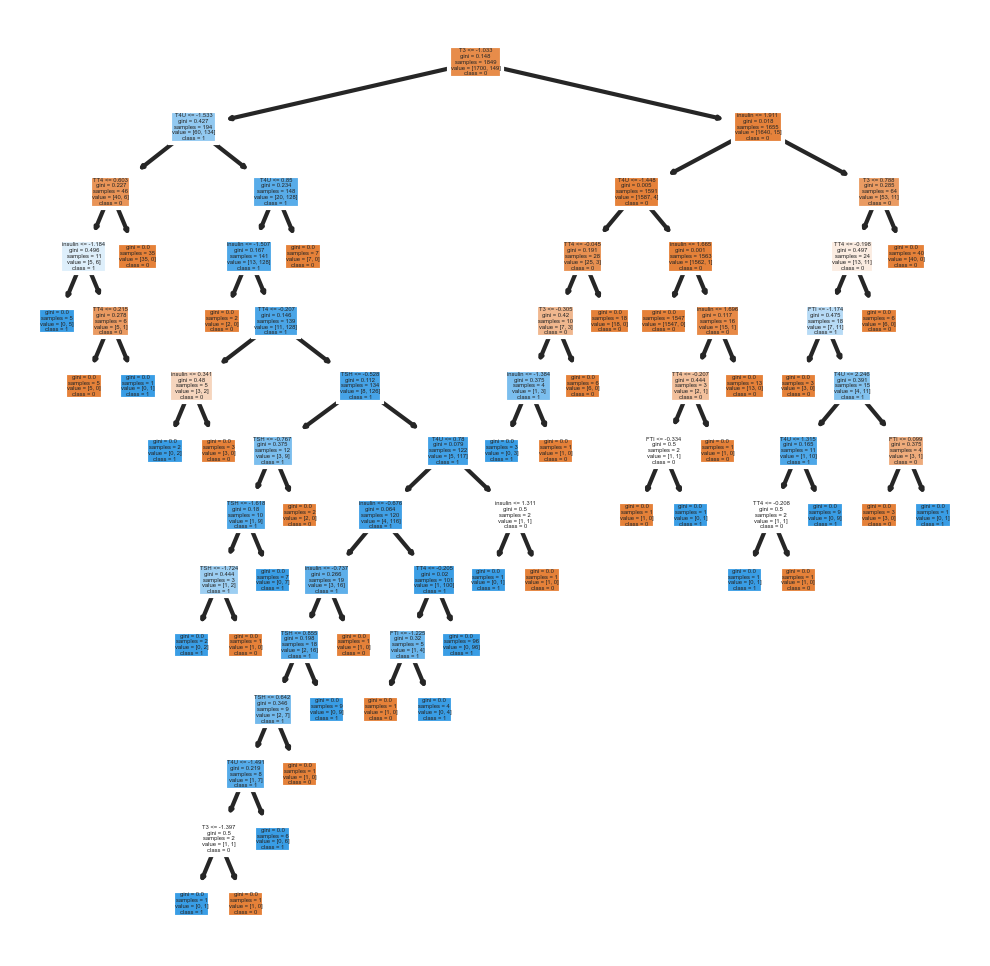

In [134]:
fn=['T3', 'insulin', 'FTI', 'T4U', 'TT4', 'TSH', 'age', 'sick', 'query_hypothyroid']

cn=['0','1']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);

Defining column names and the classes of the dataset and plotting the tree

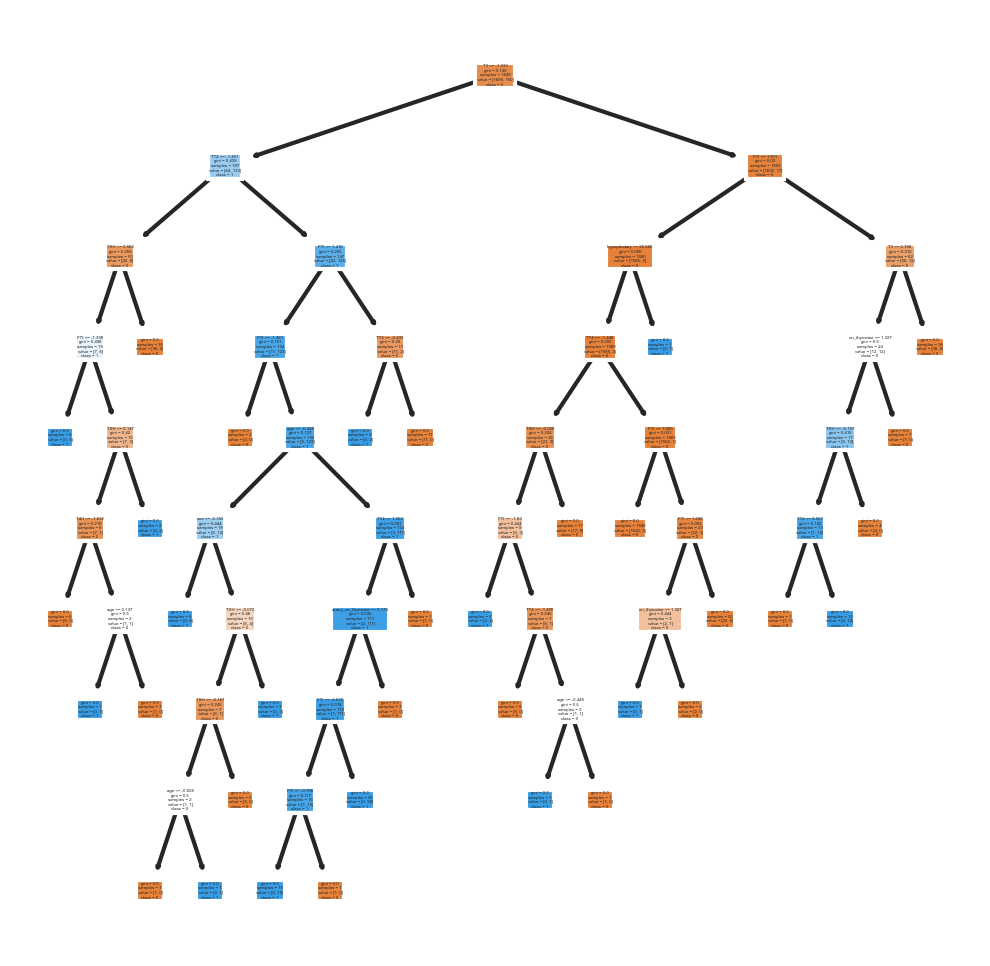

In [135]:
fn1=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
# classes of dataset
cn1=['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf1,
           feature_names = fn1, 
           class_names=cn1,
           filled = True);

Defining column names and the classes of the dataset and plotting the tree

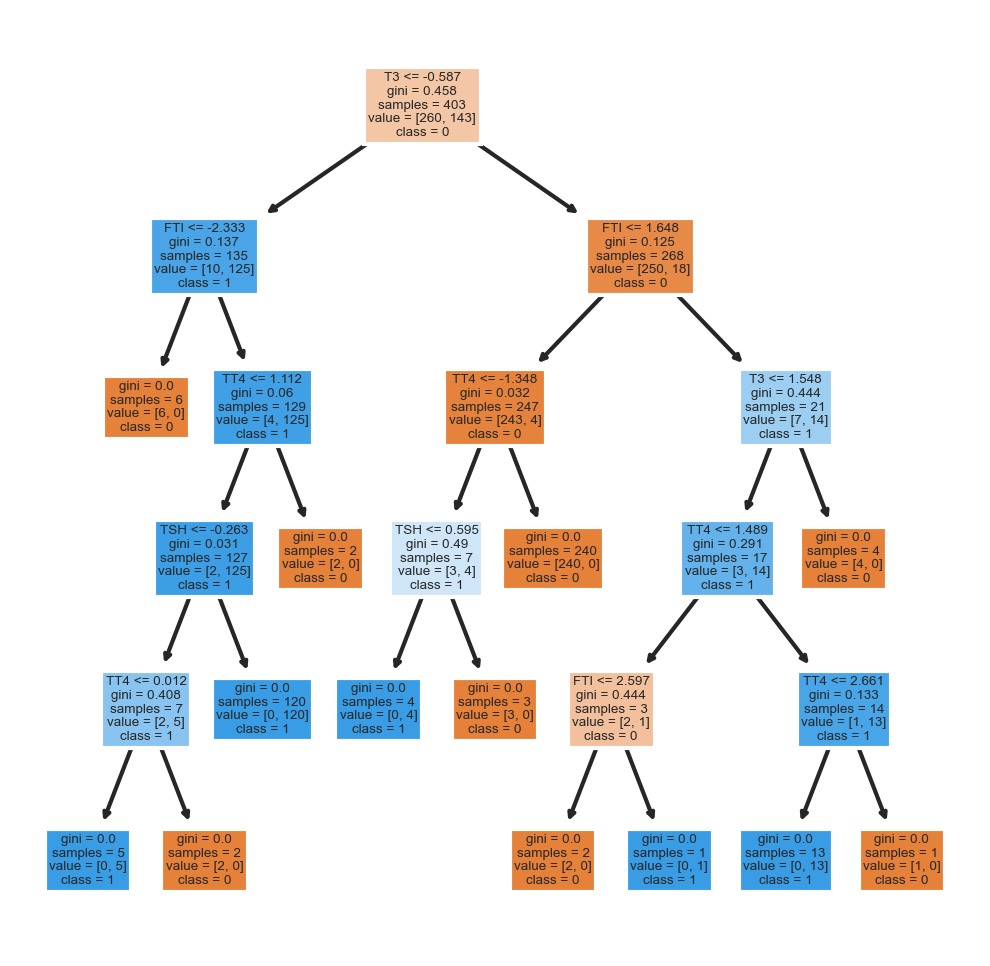

In [136]:
fn2=['T3', 'FTI', 'T4U', 'TT4', 'TSH', 'age', 'sick', 'query_hypothyroid']
# classes of dataset
cn2=['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf2,
           feature_names = fn2, 
           class_names=cn2,
           filled = True);

Splitting Data into 5 folds for the KFold splitting stratergy as input to cross_val_score() method. Then the split() method generate indices to split data into training and test set.

In [137]:
kf =KFold(n_splits=5, shuffle=True, random_state=50)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 2113, Test set:529
Fold:2, Train set: 2113, Test set:529
Fold:3, Train set: 2114, Test set:528
Fold:4, Train set: 2114, Test set:528
Fold:5, Train set: 2114, Test set:528


Creating a function for RMSE

In [138]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

Defining and printing scores

In [139]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 50), X, Y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())


Scores for each fold: [-0.02079395 -0.01890359 -0.02272727 -0.03030303 -0.02651515]
rmse= 0.15


Trying max depth starting from 1 to 10 and to find the best final ‘accuracy’ score.

In [140]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 50), X, Y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())


For max depth: 1
rmse= 0.18
For max depth: 2
rmse= 0.15
For max depth: 3
rmse= 0.13
For max depth: 4
rmse= 0.13
For max depth: 5
rmse= 0.14
For max depth: 6
rmse= 0.14
For max depth: 7
rmse= 0.14
For max depth: 8
rmse= 0.15
For max depth: 9
rmse= 0.15
For max depth: 10
rmse= 0.15


Splitting Data into 5 folds for the KFold splitting stratergy as input to cross_val_score() method. Then the split() method generate indices to split data into training and test set.

In [141]:
kf2 =KFold(n_splits=5, shuffle=True, random_state=55)

cnt2 = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf2.split(X2, Y2):
    print(f'Fold:{cnt2}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt2 += 1

Fold:1, Train set: 2113, Test set:529
Fold:2, Train set: 2113, Test set:529
Fold:3, Train set: 2114, Test set:528
Fold:4, Train set: 2114, Test set:528
Fold:5, Train set: 2114, Test set:528


Creating a function for RMSE

In [142]:
def rmse2(score2):
    rmse2 = np.sqrt(-score2)
    print(f'rmse= {"{:.2f}".format(rmse2)}')

Defining and printing scores

In [143]:
score2 = cross_val_score(tree.DecisionTreeRegressor(random_state= 55), X2, Y2, cv=kf2, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score2}')
rmse2(score2.mean())

Scores for each fold: [-0.00567108 -0.01890359 -0.03219697 -0.03787879 -0.02840909]
rmse= 0.16


Trying max depth starting from 1 to 10 and to find the best final ‘accuracy’ score.

In [144]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score2 = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 55), X2, Y2, cv= kf2, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse2(score2.mean())

For max depth: 1
rmse= 0.18
For max depth: 2
rmse= 0.15
For max depth: 3
rmse= 0.15
For max depth: 4
rmse= 0.14
For max depth: 5
rmse= 0.14
For max depth: 6
rmse= 0.14
For max depth: 7
rmse= 0.15
For max depth: 8
rmse= 0.15
For max depth: 9
rmse= 0.15
For max depth: 10
rmse= 0.16


Splitting Data into 5 folds for the KFold splitting stratergy as input to cross_val_score() method. Then the split() method generate indices to split data into training and test set.

In [145]:
kf3 =KFold(n_splits=5, shuffle=True, random_state=65)

cnt3 = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf3.split(X3, Y3):
    print(f'Fold:{cnt3}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt3 += 1

Fold:1, Train set: 460, Test set:116
Fold:2, Train set: 461, Test set:115
Fold:3, Train set: 461, Test set:115
Fold:4, Train set: 461, Test set:115
Fold:5, Train set: 461, Test set:115


Creating a function for RMSE

In [146]:
def rmse3(score3):
    rmse3 = np.sqrt(-score3)
    print(f'rmse= {"{:.2f}".format(rmse3)}')

Defining and printing scores

In [147]:
score3 = cross_val_score(tree.DecisionTreeRegressor(random_state= 65), X3, Y3, cv=kf3, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score3}')
rmse3(score3.mean())

Scores for each fold: [-0.02586207 -0.05217391 -0.03478261 -0.04347826 -0.04347826]
rmse= 0.20


Trying max depth starting from 1 to 10 and to find the best final ‘accuracy’ score.

In [148]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score3 = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 65), X3, Y3, cv= kf3, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse3(score3.mean())

For max depth: 1
rmse= 0.24
For max depth: 2
rmse= 0.20
For max depth: 3
rmse= 0.20
For max depth: 4
rmse= 0.16
For max depth: 5
rmse= 0.18
For max depth: 6
rmse= 0.19
For max depth: 7
rmse= 0.20
For max depth: 8
rmse= 0.20
For max depth: 9
rmse= 0.20
For max depth: 10
rmse= 0.20
